# PENGUMPULAN DATA

In [ ]:
pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm


import nltk
import string
import re
from sklearn.metrics.pairwise import cosine_similarity
from nltk.util import ngrams


from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
#Koneksi ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the dataset
df = pd.read_excel('/content/drive/MyDrive/Machine Learning 117/Analisis Sentimen IKN/Dataset/Sentimen Pengguna Twitter Pada Topik IKN.xlsx')
df['Tweet']

0       b'RT @AlshaibaShihab: Indonesia ditangan Presi...
1       b'@PrathumRyan @pranjaya_baguz @MightyWar3 Bus...
2       b'RT @Usuludin321: Bener juga yah kenapa sih m...
3       b'RT @msaid_didu: Pddk 200.000 yg sebagian bes...
4       b'RT @HendryanaLubis: @s1lverpegasus Dia pasti...
                              ...                        
2172    b'Progres IKN Pada Tahap Awal,Pembiayaan Masih...
2173    b'APLN Garap Kawasan Hunian Super Premium Deka...
2174    b'RT @HukumDan: Wuiih. Serius ini kek nya pind...
2175    b'RT @LaNyallaAcademy: APA URGENSINYA SAMPAI H...
2176    b'Masyarakat Kalimantan Timur Dukung Pembangun...
Name: Tweet, Length: 2177, dtype: object

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,No.,Sentimen,Tweet
0,1.0,Positif,b'RT @AlshaibaShihab: Indonesia ditangan Presi...
1,2.0,Negatif,b'@PrathumRyan @pranjaya_baguz @MightyWar3 Bus...
2,3.0,Negatif,b'RT @Usuludin321: Bener juga yah kenapa sih m...
3,4.0,Negatif,b'RT @msaid_didu: Pddk 200.000 yg sebagian bes...
4,5.0,Negatif,b'RT @HendryanaLubis: @s1lverpegasus Dia pasti...
...,...,...,...
2172,2173.0,Positif,"b'Progres IKN Pada Tahap Awal,Pembiayaan Masih..."
2173,2174.0,Positif,b'APLN Garap Kawasan Hunian Super Premium Deka...
2174,2175.0,Negatif,b'RT @HukumDan: Wuiih. Serius ini kek nya pind...
2175,2176.0,Negatif,b'RT @LaNyallaAcademy: APA URGENSINYA SAMPAI H...


(array([1451.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         726.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

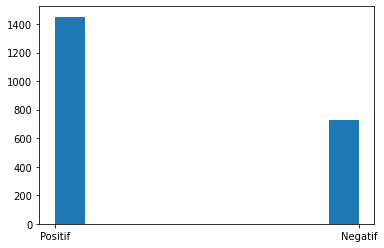

In [ ]:
#Visualisasi Data
plt.hist(df.Sentimen)

# PRE-PROCESSING TEXT

In [ ]:
#Cleansing Data
def cleansing(text):
    #Menghilangkan tanda kurung
    text = re.sub('\[.*?\]', '', text)
    #Menghilangkan Tanda Baca
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #Menghilangkan Special Karakter
    text = re.sub('\w*\d\w*', '', text)
    #Menghilangkan Single Character
    text = re.sub('\s+[a-zA-Z]\s+', '', text)
    #Menghilangkan Link
    text = re.sub(r"http\S+", "", text, flags=re.MULTILINE)
    #Menghilangkan Hashtag
    text = re.sub(r'\B#\S+','', text)
    #Mengganti Multiple Spaces ke Single Spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    #Menghilangkan Spaces di awal
    text = text.strip()
    return text
df['CLEANSING']= df['Tweet'].apply(lambda x: cleansing(x))

In [ ]:
df.head()

,No.,Sentimen,Tweet,CLEANSING
0,1.0,Positif,b'RT @AlshaibaShihab: Indonesia ditangan Presi...,bRT AlshaibaShihab Indonesia ditangan Presiden...
1,2.0,Negatif,b'@PrathumRyan @pranjaya_baguz @MightyWar3 Bus...,bPrathumRyan pranjayabaguz Buset Miliar USD ka...
2,3.0,Negatif,b'RT @Usuludin321: Bener juga yah kenapa sih m...,bRT Bener juga yah kenapa sih maksain bangun I...
3,4.0,Negatif,b'RT @msaid_didu: Pddk 200.000 yg sebagian bes...,bRT msaiddidu Pddk yg sebagian besar adalah AS...
4,5.0,Negatif,b'RT @HendryanaLubis: @s1lverpegasus Dia pasti...,bRT HendryanaLubis Dia pasti mendukung sapa yg...


In [ ]:
df.to_excel("/content/drive/MyDrive/Machine Learning 117/Analisis Sentimen IKN/Hasil QE/Cleansing.xlsx")

In [ ]:
#CaseFolding
def case_folding(text):
    text = text.lower()
    return text
df['CASEFOLDING']= df['CLEANSING'].apply(lambda x: case_folding(x))
df.head()

,No.,Sentimen,Tweet,CLEANSING,CASEFOLDING
0,1.0,Positif,b'RT @AlshaibaShihab: Indonesia ditangan Presi...,bRT AlshaibaShihab Indonesia ditangan Presiden...,brt alshaibashihab indonesia ditangan presiden...
1,2.0,Negatif,b'@PrathumRyan @pranjaya_baguz @MightyWar3 Bus...,bPrathumRyan pranjayabaguz Buset Miliar USD ka...,bprathumryan pranjayabaguz buset miliar usd ka...
2,3.0,Negatif,b'RT @Usuludin321: Bener juga yah kenapa sih m...,bRT Bener juga yah kenapa sih maksain bangun I...,brt bener juga yah kenapa sih maksain bangun i...
3,4.0,Negatif,b'RT @msaid_didu: Pddk 200.000 yg sebagian bes...,bRT msaiddidu Pddk yg sebagian besar adalah AS...,brt msaiddidu pddk yg sebagian besar adalah as...
4,5.0,Negatif,b'RT @HendryanaLubis: @s1lverpegasus Dia pasti...,bRT HendryanaLubis Dia pasti mendukung sapa yg...,brt hendryanalubis dia pasti mendukung sapa yg...


In [ ]:
df

,No.,Sentimen,Tweet,CLEANSING,CASEFOLDING
0,1.0,Positif,b'RT @AlshaibaShihab: Indonesia ditangan Presi...,bRT AlshaibaShihab Indonesia ditangan Presiden...,brt alshaibashihab indonesia ditangan presiden...
1,2.0,Negatif,b'@PrathumRyan @pranjaya_baguz @MightyWar3 Bus...,bPrathumRyan pranjayabaguz Buset Miliar USD ka...,bprathumryan pranjayabaguz buset miliar usd ka...
2,3.0,Negatif,b'RT @Usuludin321: Bener juga yah kenapa sih m...,bRT Bener juga yah kenapa sih maksain bangun I...,brt bener juga yah kenapa sih maksain bangun i...
3,4.0,Negatif,b'RT @msaid_didu: Pddk 200.000 yg sebagian bes...,bRT msaiddidu Pddk yg sebagian besar adalah AS...,brt msaiddidu pddk yg sebagian besar adalah as...
4,5.0,Negatif,b'RT @HendryanaLubis: @s1lverpegasus Dia pasti...,bRT HendryanaLubis Dia pasti mendukung sapa yg...,brt hendryanalubis dia pasti mendukung sapa yg...
...,...,...,...,...,...
2172,2173.0,Positif,"b'Progres IKN Pada Tahap Awal,Pembiayaan Masih...",bProgres IKN Pada Tahap AwalPembiayaan Masih D...,bprogres ikn pada tahap awalpembiayaan masih d...
2173,2174.0,Positif,b'APLN Garap Kawasan Hunian Super Premium Deka...,bAPLN Garap Kawasan Hunian Super Premium Dekat...,bapln garap kawasan hunian super premium dekat...
2174,2175.0,Negatif,b'RT @HukumDan: Wuiih. Serius ini kek nya pind...,bRT HukumDan Wuiih Serius ini kek nya pindah S...,brt hukumdan wuiih serius ini kek nya pindah s...
2175,2176.0,Negatif,b'RT @LaNyallaAcademy: APA URGENSINYA SAMPAI H...,bRT LaNyallaAcademy APA URGENSINYA SAMPAI HARU...,brt lanyallaacademy apa urgensinya sampai haru...


In [ ]:
#Tokenizing
#Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
df['TOKENIZATION']= df['CASEFOLDING'].apply(lambda x: tokenization(x))
df.head()

,No.,Sentimen,Tweet,CLEANSING,CASEFOLDING,TOKENIZATION
0,1.0,Positif,b'RT @AlshaibaShihab: Indonesia ditangan Presi...,bRT AlshaibaShihab Indonesia ditangan Presiden...,brt alshaibashihab indonesia ditangan presiden...,"[brt, alshaibashihab, indonesia, ditangan, pre..."
1,2.0,Negatif,b'@PrathumRyan @pranjaya_baguz @MightyWar3 Bus...,bPrathumRyan pranjayabaguz Buset Miliar USD ka...,bprathumryan pranjayabaguz buset miliar usd ka...,"[bprathumryan, pranjayabaguz, buset, miliar, u..."
2,3.0,Negatif,b'RT @Usuludin321: Bener juga yah kenapa sih m...,bRT Bener juga yah kenapa sih maksain bangun I...,brt bener juga yah kenapa sih maksain bangun i...,"[brt, bener, juga, yah, kenapa, sih, maksain, ..."
3,4.0,Negatif,b'RT @msaid_didu: Pddk 200.000 yg sebagian bes...,bRT msaiddidu Pddk yg sebagian besar adalah AS...,brt msaiddidu pddk yg sebagian besar adalah as...,"[brt, msaiddidu, pddk, yg, sebagian, besar, ad..."
4,5.0,Negatif,b'RT @HendryanaLubis: @s1lverpegasus Dia pasti...,bRT HendryanaLubis Dia pasti mendukung sapa yg...,brt hendryanalubis dia pasti mendukung sapa yg...,"[brt, hendryanalubis, dia, pasti, mendukung, s..."


In [ ]:
# read txt stopword using pandas
txt_stopword = pd.read_excel("/content/drive/MyDrive/Machine Learning 117/Analisis Sentimen IKN/Kamus/kamus_stopword.xlsx", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords = txt_stopword['stopwords'].values.tolist()

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['STOP REMOVAL'] = df['TOKENIZATION'].apply(stopwords_removal)


print(df['STOP REMOVAL'].head())

0    [brt, alshaibashihab, indonesia, ditangan, pre...
1    [bprathumryan, pranjayabaguz, buset, miliar, u...
2         [brt, bener, yah, sih, maksain, bangun, ikn]
3    [brt, msaiddidu, pddk, yg, asn, yg, gajinya, s...
4    [brt, hendryanalubis, pasti, mendukung, sapa, ...
Name: STOP REMOVAL, dtype: object


In [ ]:
df.to_excel("/content/drive/MyDrive/Machine Learning 117/Analisis Sentimen IKN/Hasil QE/StopwordRemoval.xlsx")

In [ ]:
#StopwordRemoval
final = pd.DataFrame(df, columns= ['Sentimen', 'STOP REMOVAL'])
final

,Sentimen,STOP REMOVAL
0,Positif,"[brt, alshaibashihab, indonesia, ditangan, pre..."
1,Negatif,"[bprathumryan, pranjayabaguz, buset, miliar, u..."
2,Negatif,"[brt, bener, yah, sih, maksain, bangun, ikn]"
3,Negatif,"[brt, msaiddidu, pddk, yg, asn, yg, gajinya, s..."
4,Negatif,"[brt, hendryanalubis, pasti, mendukung, sapa, ..."
...,...,...
2172,Positif,"[bprogres, ikn, tahap, awalpembiayaan, masih, ..."
2173,Positif,"[bapln, garap, kawasan, hunian, super, premium..."
2174,Negatif,"[brt, hukumdan, wuiih, serius, kek, nya, pinda..."
2175,Negatif,"[brt, lanyallaacademy, urgensinya, harus, meng..."


In [ ]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 830 kB 7.1 MB/s 
     |████████████████████████████████| 280 kB 50.8 MB/s 
     |████████████████████████████████| 1.6 MB 50.7 MB/s 
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=2485c87c726196658df04f438385349ae95f380488ccfe23733422367d8b2bb5
  Stored in directory: /root/.cache/pip/wheels/08/66/b4/921e351e63d88696932279d6163e125727c9da70ed8ca38419
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
#Stemming
import swifter
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in final['STOP REMOVAL']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

final['STEMMING'] = final['STOP REMOVAL'].apply(get_stemmed_term)

2425
------------------------
brt : brt
alshaibashihab : alshaibashihab
indonesia : indonesia
ditangan : tang
presiden : presiden
jokowi : jokowi
bendungan : bendung
ruas : ruas
jalan : jalan
bandara : bandara
barunsirkuit : barunsirkuit
mandalikankereta : mandalikankereta
api : api
bprathumryan : bprathumryan
pranjayabaguz : pranjayabaguz
buset : buset
miliar : miliar
usd : usd
kalahin : kalahin
anggaran : anggar
militer : militer
bener : bener
yah : yah
sih : sih
maksain : maksain
bangun : bangun
ikn : ikn
msaiddidu : msaiddidu
pddk : pddk
yg : yg
asn : asn
gajinya : gaji
sdh : sdh
habis : habis
utk : utk
cicilan : cicil
rumah : rumah
kendaraan : kendara
biaya : biaya
anak : anak
sekolah : sekolah
shg : shg
hendryanalubis : hendryanalubis
pasti : pasti
mendukung : dukung
sapa : sapa
bisa : bisa
lanjutkan : lanjut
orang : orang
berani : berani
gk : gk
kalo : kalo
pindah : pindah
kalimnatannnburuan : kalimnatannnburuan
bpemerintah : bpemerintah
susun : susun
rencana : rencana
pengemban

In [ ]:
final.head()

,Sentimen,STOP REMOVAL,STEMMING
0,Positif,"[brt, alshaibashihab, indonesia, ditangan, pre...","[brt, alshaibashihab, indonesia, tang, preside..."
1,Negatif,"[bprathumryan, pranjayabaguz, buset, miliar, u...","[bprathumryan, pranjayabaguz, buset, miliar, u..."
2,Negatif,"[brt, bener, yah, sih, maksain, bangun, ikn]","[brt, bener, yah, sih, maksain, bangun, ikn]"
3,Negatif,"[brt, msaiddidu, pddk, yg, asn, yg, gajinya, s...","[brt, msaiddidu, pddk, yg, asn, yg, gaji, sdh,..."
4,Negatif,"[brt, hendryanalubis, pasti, mendukung, sapa, ...","[brt, hendryanalubis, pasti, dukung, sapa, yg,..."


In [ ]:
kbba = pd.read_excel('/content/drive/MyDrive/Machine Learning 117/Analisis Sentimen IKN/Kamus/kamus_normalisasi.xlsx')

In [ ]:
kbba

,Original,Replacement
0,abis,habis
1,ad,ada
2,adlah,adalah
3,adlh,adalah
4,adoh,aduh
...,...,...
1341,yowes,ya sudah
1342,yuk,ayo
1343,yup,iya
1344,ywdh,ya sudah


In [ ]:
#Normalisasi

normalizad_word_dict = {}

for index, row in kbba.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

final['NORMALISASI'] = final['STEMMING'].apply(normalized_term)

final['NORMALISASI'].head(10)

0    [brt, alshaibashihab, indonesia, tang, preside...
1    [bprathumryan, pranjayabaguz, buset, miliar, u...
2         [brt, benar, yah, sih, memaksa, bangun, ikn]
3    [brt, msaiddidu, pddk, yang, asn, yang, gaji, ...
4    [brt, hendryanalubis, pasti, dukung, siapa, ya...
5    [orang, berani, tidak, kalau, ikn, pindah, kal...
6    [bpemerintah, susun, rencana, kembang, infrast...
7    [brt, ikn, penting, entas, miskin, mas, joko, ...
8    [bpemerintah, susun, rencana, kembang, infrast...
9    [bzackyramadhani, alshaibashihab, bertanya, fu...
Name: NORMALISASI, dtype: object

In [ ]:
def fit_normalisasi(text):
    text = np.array(text)
    text = ' '.join(text)

    return text
final['NORMALISASI'] = final['NORMALISASI'].apply(lambda x: fit_normalisasi(x))
final.head()

,Sentimen,STOP REMOVAL,STEMMING,NORMALISASI
0,Positif,"[brt, alshaibashihab, indonesia, ditangan, pre...","[brt, alshaibashihab, indonesia, tang, preside...",brt alshaibashihab indonesia tang presiden jok...
1,Negatif,"[bprathumryan, pranjayabaguz, buset, miliar, u...","[bprathumryan, pranjayabaguz, buset, miliar, u...",bprathumryan pranjayabaguz buset miliar usd ka...
2,Negatif,"[brt, bener, yah, sih, maksain, bangun, ikn]","[brt, bener, yah, sih, maksain, bangun, ikn]",brt benar yah sih memaksa bangun ikn
3,Negatif,"[brt, msaiddidu, pddk, yg, asn, yg, gajinya, s...","[brt, msaiddidu, pddk, yg, asn, yg, gaji, sdh,...",brt msaiddidu pddk yang asn yang gaji sudah ha...
4,Negatif,"[brt, hendryanalubis, pasti, mendukung, sapa, ...","[brt, hendryanalubis, pasti, dukung, sapa, yg,...",brt hendryanalubis pasti dukung siapa yang bis...


In [ ]:
final.to_excel("/content/drive/MyDrive/Machine Learning 117/Analisis Sentimen IKN/Hasil QE/Normalisasi.xlsx")

In [ ]:
#NORMALISASI NEGASI
def convert_negasi(text):
    text = re.sub("tidak ", 'tidak', text, flags=re.MULTILINE)
    text = re.sub("jangan ", 'jangan', text, flags=re.MULTILINE)
    text = re.sub("belum ", 'belum', text, flags=re.MULTILINE)
    text = re.sub("bukan ", 'bukan', text, flags=re.MULTILINE)
    text = re.sub("tanpa ", 'tanpa', text, flags=re.MULTILINE)
    text = re.sub("bukanlah ", 'bukanlah', text, flags=re.MULTILINE)
    text = re.sub("tak ", 'tak', text, flags=re.MULTILINE)
    text = re.sub("anti ", 'anti', text, flags=re.MULTILINE)
    return text
final['NORMALISASI']= final['NORMALISASI'].apply(lambda x: convert_negasi(x))
final

,Sentimen,STOP REMOVAL,STEMMING,NORMALISASI
0,Positif,"[brt, alshaibashihab, indonesia, ditangan, pre...","[brt, alshaibashihab, indonesia, tang, preside...",brt alshaibashihab indonesia tang presiden jok...
1,Negatif,"[bprathumryan, pranjayabaguz, buset, miliar, u...","[bprathumryan, pranjayabaguz, buset, miliar, u...",bprathumryan pranjayabaguz buset miliar usd ka...
2,Negatif,"[brt, bener, yah, sih, maksain, bangun, ikn]","[brt, bener, yah, sih, maksain, bangun, ikn]",brt benar yah sih memaksa bangun ikn
3,Negatif,"[brt, msaiddidu, pddk, yg, asn, yg, gajinya, s...","[brt, msaiddidu, pddk, yg, asn, yg, gaji, sdh,...",brt msaiddidu pddk yang asn yang gaji sudah ha...
4,Negatif,"[brt, hendryanalubis, pasti, mendukung, sapa, ...","[brt, hendryanalubis, pasti, dukung, sapa, yg,...",brt hendryanalubis pasti dukung siapa yang bis...
...,...,...,...,...
2172,Positif,"[bprogres, ikn, tahap, awalpembiayaan, masih, ...","[bprogres, ikn, tahap, awalpembiayaan, masih, ...",bprogres ikn tahap awalpembiayaan masih sokong...
2173,Positif,"[bapln, garap, kawasan, hunian, super, premium...","[bapln, garap, kawasan, huni, super, premium, ...",bapln garap kawasan huni super premium ikn minat
2174,Negatif,"[brt, hukumdan, wuiih, serius, kek, nya, pinda...","[brt, hukumdan, wuiih, serius, kek, nya, pinda...",brt hukumdan wuiih serius seperti nya pindah a...
2175,Negatif,"[brt, lanyallaacademy, urgensinya, harus, meng...","[brt, lanyallaacademy, urgensi, harus, kumpul,...",brt lanyallaacademy urgensi harus kumpul kepal...


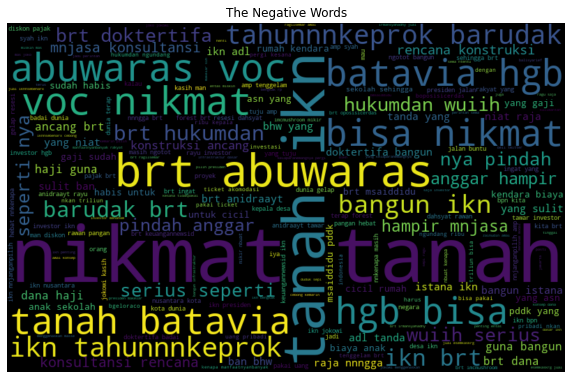

In [ ]:
from wordcloud import WordCloud


negative_words =' '.join([text for text in final['NORMALISASI'][final['Sentimen'] == 'Negatif']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

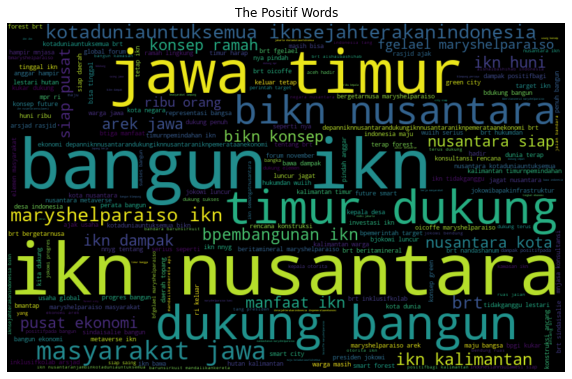

In [ ]:
from wordcloud import WordCloud

positif_words =' '.join([text for text in final['NORMALISASI'][final['Sentimen'] == 'Positif']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(positif_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positif Words')
plt.show()

In [ ]:
#Merubah Sentimen ke Polarity
#Konversi Sentimen Ke Polaritas
def convert(polarity):
    if polarity == 'Positif':
        return 1
    else:
        return -1

In [ ]:
final['Polarity'] = final['Sentimen'].apply(convert)
final


,Sentimen,STOP REMOVAL,STEMMING,NORMALISASI,Polarity
0,Positif,"[brt, alshaibashihab, indonesia, ditangan, pre...","[brt, alshaibashihab, indonesia, tang, preside...",brt alshaibashihab indonesia tang presiden jok...,1
1,Negatif,"[bprathumryan, pranjayabaguz, buset, miliar, u...","[bprathumryan, pranjayabaguz, buset, miliar, u...",bprathumryan pranjayabaguz buset miliar usd ka...,-1
2,Negatif,"[brt, bener, yah, sih, maksain, bangun, ikn]","[brt, bener, yah, sih, maksain, bangun, ikn]",brt benar yah sih memaksa bangun ikn,-1
3,Negatif,"[brt, msaiddidu, pddk, yg, asn, yg, gajinya, s...","[brt, msaiddidu, pddk, yg, asn, yg, gaji, sdh,...",brt msaiddidu pddk yang asn yang gaji sudah ha...,-1
4,Negatif,"[brt, hendryanalubis, pasti, mendukung, sapa, ...","[brt, hendryanalubis, pasti, dukung, sapa, yg,...",brt hendryanalubis pasti dukung siapa yang bis...,-1
...,...,...,...,...,...
2172,Positif,"[bprogres, ikn, tahap, awalpembiayaan, masih, ...","[bprogres, ikn, tahap, awalpembiayaan, masih, ...",bprogres ikn tahap awalpembiayaan masih sokong...,1
2173,Positif,"[bapln, garap, kawasan, hunian, super, premium...","[bapln, garap, kawasan, huni, super, premium, ...",bapln garap kawasan huni super premium ikn minat,1
2174,Negatif,"[brt, hukumdan, wuiih, serius, kek, nya, pinda...","[brt, hukumdan, wuiih, serius, kek, nya, pinda...",brt hukumdan wuiih serius seperti nya pindah a...,-1
2175,Negatif,"[brt, lanyallaacademy, urgensinya, harus, meng...","[brt, lanyallaacademy, urgensi, harus, kumpul,...",brt lanyallaacademy urgensi harus kumpul kepal...,-1


In [ ]:
final.to_excel("/content/drive/MyDrive/Machine Learning 117/Analisis Sentimen IKN/Hasil QE/Setelah Pre-Processing.xlsx")

In [ ]:
#Split Data
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(final['NORMALISASI'],final['Polarity'], test_size=0.1, random_state=30)
#print(X_Test)

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

# PEMBOBOTAN TF-IDF

In [ ]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(final['NORMALISASI'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
Train_X_Tfidf.shape

(1959, 2136)

In [ ]:
Train_Y.shape

(1959,)

In [ ]:
print(Train_X_Tfidf)

  (0, 1890)	0.3192559249260791
  (0, 1715)	0.3192559249260791
  (0, 1624)	0.22853996841885849
  (0, 1232)	0.3192559249260791
  (0, 984)	0.20910271111265352
  (0, 950)	0.24796134345336104
  (0, 888)	0.18282757795129892
  (0, 427)	0.09627162483455953
  (0, 219)	0.30128691509913164
  (0, 156)	0.3192559249260791
  (0, 126)	0.3192559249260791
  (0, 71)	0.3158093008236477
  (0, 35)	0.3158093008236477
  (1, 2100)	0.2595761337654515
  (1, 1886)	0.5094999434532351
  (1, 1881)	0.2602058559258072
  (1, 1389)	0.519152267530903
  (1, 845)	0.08565753948388173
  (1, 808)	0.24506346566152237
  (1, 427)	0.11522186394597704
  (1, 291)	0.2280640644250436
  (1, 162)	0.2602058559258072
  (1, 152)	0.2602058559258072
  (1, 1)	0.2602058559258072
  (2, 1673)	0.40728722483186147
  :	:
  (1956, 135)	0.27186471769937676
  (1957, 1998)	0.17564708574960286
  (1957, 1899)	0.37409711182229516
  (1957, 1823)	0.24873028888658796
  (1957, 1245)	0.179317973503729
  (1957, 1114)	0.21501331529577783
  (1957, 978)	0.4051568

In [ ]:
print(Test_X_Tfidf)

  (0, 1895)	0.6860235411743747
  (0, 1436)	0.21333833800765922
  (0, 845)	0.11502241279538358
  (0, 202)	0.6860235411743747
  (1, 1647)	0.45987397123078894
  (1, 845)	0.11661403139724562
  (1, 330)	0.6955163678584297
  (1, 160)	0.5396054858011762
  (2, 2100)	0.2595761337654515
  (2, 1886)	0.5094999434532351
  (2, 1881)	0.2602058559258072
  (2, 1389)	0.519152267530903
  (2, 845)	0.08565753948388173
  (2, 808)	0.24506346566152237
  (2, 427)	0.11522186394597704
  (2, 291)	0.2280640644250436
  (2, 162)	0.2602058559258072
  (2, 152)	0.2602058559258072
  (2, 1)	0.2602058559258072
  (3, 1998)	0.26472569150503106
  (3, 1251)	0.3422136595127438
  (3, 1245)	0.27025825297624007
  (3, 970)	0.26919263982760533
  (3, 845)	0.11210305380015483
  (3, 662)	0.23492347694392562
  :	:
  (216, 1739)	0.32814676141552196
  (216, 1491)	0.3439638235071796
  (216, 1436)	0.14457835732841395
  (216, 1105)	0.39204769680934193
  (216, 1022)	0.32037988953436813
  (216, 1015)	0.3774299584035735
  (216, 845)	0.07795013

# QUERY EXPANSION


In [ ]:
import expansion
import xlrd


queryList = []
# we want to keep the list of unique queries
uniqueQuery = []

workbook = xlrd.open_workbook('data/m.xls')
sheet_names = workbook.sheet_names()
xl_sheet = workbook.sheet_by_name(sheet_names[0])

for row_idx in range(0, xl_sheet.nrows):    # Iterate through rows
        cell_id = xl_sheet.cell(row_idx, 0).value  # Get id cell
        cell_topic = xl_sheet.cell(row_idx, 2).value  # Get topic cell
        if str(cell_topic) not in uniqueQuery:
            queryList.append(str(cell_id) + "," + str(cell_topic))
            uniqueQuery.append(str(cell_topic))

# the list of queries that we want to expand
expansion.run(queryList)

# METODE KLASIFIKASI SVM

In [ ]:
hyperparameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svm = SVC()
svm_tuned = GridSearchCV(svm, hyperparameters)

In [ ]:
svm_tuned.fit(Train_X_Tfidf, Train_Y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
svm = SVC(C=1, kernel='linear', degree=3, gamma='scale')
svm.fit(Train_X_Tfidf,Train_Y)

SVC(C=1, kernel='linear')

In [ ]:
filename = 'model_svm_IKN.pkl'
pickle.dump(svm, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Test_X_Tfidf, Test_Y)
print(result)

0.926605504587156


# EVALUASI KERJA

In [ ]:
# HASIL AKURASI, RECALL, PRECISSION, F1 SCORE

predict_test = svm.predict(Test_X_Tfidf)

print("SVM Accuracy Score = ", accuracy_score(predict_test, Test_Y)*100)
print("SVM Precision Score = ", recall_score(predict_test, Test_Y)*100)
print("SVM Recall Score = ", precision_score(predict_test, Test_Y)*100)
print("SVM f1 Score = ", f1_score(predict_test, Test_Y)*100)

SVM Accuracy Score =  92.66055045871559
SVM Precision Score =  93.79310344827586
SVM Recall Score =  95.1048951048951
SVM f1 Score =  94.44444444444446


In [ ]:
report = classification_report(Test_Y, predict_test)
print(report) # print classification_report

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        75
           1       0.94      0.95      0.94       143

    accuracy                           0.93       218
   macro avg       0.92      0.92      0.92       218
weighted avg       0.93      0.93      0.93       218



In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                         normalize=False,
                         title=None,
                         cmap=plt.cm.Blues):

    """
    This functions
    normalize=True
    """

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        title = 'Confusion matrix, without normalization'

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          xticklabels=classes, yticklabels=classes,
          title=title,
          ylabel='True label',
          xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    fmt= '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                   ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black")
            fig.tight_layout()
            return ax

    np.set_printoptions(precision=2)



[[ 66   9]
 [  7 136]]


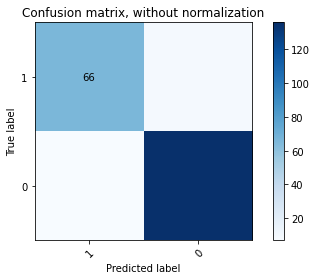

In [ ]:
class_names = Test_Y
plot_confusion_matrix(Test_Y, predict_test, classes=class_names,
                     title='Confusion matrix, without normalization')
plt.show()

In [ ]:
print('CONFUSION MATRIX')
print('[TP  FN]')
print('[FP  TN]')
confusion_matrix(Test_Y, predict_test, labels=[1, 0])

CONFUSION MATRIX
[TP  FN]
[FP  TN]


array([[136,   7],
       [  9,  66]])

In [ ]:
# HASIL AKURASI, RECALL, PRECISSION, F1 SCORE DENGAN CONFUSION MATRIX

TP = 87
FN = 6
FP = 0
TN = 107

accuracy = (TP+TN)/(TP+FN+FP+TN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = 2 *precision*recall/(precision+recall)


print("HASIL AKURASI, RECALL, PRECISION, F1 SCORE DENGAN CONFUSION MATRIX \n")

print("SVM Accuracy Score = ", accuracy*100 ,"%")
print("SVM Precision Score = ", precision*100,"%")
print("SVM Recall Score = ", recall*100,"%")
print("SVM f1 Score = ", f1*100,"%")

HASIL AKURASI, RECALL, PRECISION, F1 SCORE DENGAN CONFUSION MATRIX 

SVM Accuracy Score =  97.0 %
SVM Precision Score =  100.0 %
SVM Recall Score =  93.54838709677419 %
SVM f1 Score =  96.66666666666666 %


# EVALUASI VALIDASI K-FOLD CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
#10 FOLD
scores_test = cross_val_score(svm, Test_X_Tfidf, Test_Y, cv = 10)
print("Hasil Akurasi menggunakan 10 Fold Cross Validation \n")
for i in range(10):
    print("Akurasi dari SVM Iterasi ke -", i+1, "  : {0:2}".format(scores_test[i,]*100))
print("\n","Rata-Rata Akurasi dari SVM menggunakan Cross Validation :", scores_test.mean()*100)

Hasil Akurasi menggunakan 10 Fold Cross Validation 

Akurasi dari SVM Iterasi ke - 1   : 90.9090909090909
Akurasi dari SVM Iterasi ke - 2   : 95.45454545454545
Akurasi dari SVM Iterasi ke - 3   : 86.36363636363636
Akurasi dari SVM Iterasi ke - 4   : 90.9090909090909
Akurasi dari SVM Iterasi ke - 5   : 81.81818181818183
Akurasi dari SVM Iterasi ke - 6   : 95.45454545454545
Akurasi dari SVM Iterasi ke - 7   : 95.45454545454545
Akurasi dari SVM Iterasi ke - 8   : 86.36363636363636
Akurasi dari SVM Iterasi ke - 9   : 85.71428571428571
Akurasi dari SVM Iterasi ke - 10   : 95.23809523809523

 Rata-Rata Akurasi dari SVM menggunakan Cross Validation : 90.36796536796538


In [ ]:
#10 FOLD - Precission

scores_test = cross_val_score(svm_tuned, Test_X_Tfidf, Test_Y, cv = 10, scoring='precision')
scores_test
print("Hasil Presisi menggunakan 10 Fold Cross Validation \n")
for i in range(10):
    print("Presisi dari SVM Iterasi ke -", i+1, "  : {0:2}".format(scores_test[i,]*100))
print("\n","Rata-Rata Presisi dari SVM menggunakan Cross Validation :", scores_test.mean()*100)

Hasil Presisi menggunakan 10 Fold Cross Validation 

Presisi dari SVM Iterasi ke - 1   : 93.33333333333333
Presisi dari SVM Iterasi ke - 2   : 100.0
Presisi dari SVM Iterasi ke - 3   : 87.5
Presisi dari SVM Iterasi ke - 4   : 87.5
Presisi dari SVM Iterasi ke - 5   : 85.71428571428571
Presisi dari SVM Iterasi ke - 6   : 93.33333333333333
Presisi dari SVM Iterasi ke - 7   : 93.33333333333333
Presisi dari SVM Iterasi ke - 8   : 92.3076923076923
Presisi dari SVM Iterasi ke - 9   : 86.66666666666667
Presisi dari SVM Iterasi ke - 10   : 100.0

 Rata-Rata Presisi dari SVM menggunakan Cross Validation : 91.96886446886448


In [ ]:
#10 FOLD - Recall

scores_test = cross_val_score(svm_tuned, Test_X_Tfidf, Test_Y, cv = 10, scoring='recall')
scores_test
print("Hasil Recall menggunakan 10 Fold Cross Validation \n")
for i in range(10):
    print("Recall dari SVM Iterasi ke -", i+1, "  : {0:2}".format(scores_test[i,]*100))
print("\n","Rata-Rata Recall dari SVM menggunakan Cross Validation :", scores_test.mean()*100)

Hasil Recall menggunakan 10 Fold Cross Validation 

Recall dari SVM Iterasi ke - 1   : 93.33333333333333
Recall dari SVM Iterasi ke - 2   : 93.33333333333333
Recall dari SVM Iterasi ke - 3   : 93.33333333333333
Recall dari SVM Iterasi ke - 4   : 100.0
Recall dari SVM Iterasi ke - 5   : 85.71428571428571
Recall dari SVM Iterasi ke - 6   : 100.0
Recall dari SVM Iterasi ke - 7   : 100.0
Recall dari SVM Iterasi ke - 8   : 85.71428571428571
Recall dari SVM Iterasi ke - 9   : 92.85714285714286
Recall dari SVM Iterasi ke - 10   : 100.0

 Rata-Rata Recall dari SVM menggunakan Cross Validation : 94.42857142857143


In [ ]:
#10 FOLD - F1 SCORE

scores_test = cross_val_score(svm_tuned, Test_X_Tfidf, Test_Y, cv = 10, scoring='f1')
scores_test
print("Hasil F1 Score menggunakan 10 Fold Cross Validation \n")
for i in range(10):
    print("F1 Score dari SVM Iterasi ke -", i+1, "  : {0:2}".format(scores_test[i,]*100))
print("\n","Rata-Rata F1 Score dari SVM menggunakan Cross Validation :", scores_test.mean()*100)

Hasil F1 Score menggunakan 10 Fold Cross Validation 

F1 Score dari SVM Iterasi ke - 1   : 93.33333333333333
F1 Score dari SVM Iterasi ke - 2   : 96.55172413793103
F1 Score dari SVM Iterasi ke - 3   : 90.32258064516128
F1 Score dari SVM Iterasi ke - 4   : 93.33333333333333
F1 Score dari SVM Iterasi ke - 5   : 85.71428571428571
F1 Score dari SVM Iterasi ke - 6   : 96.55172413793103
F1 Score dari SVM Iterasi ke - 7   : 96.55172413793103
F1 Score dari SVM Iterasi ke - 8   : 88.8888888888889
F1 Score dari SVM Iterasi ke - 9   : 89.65517241379311
F1 Score dari SVM Iterasi ke - 10   : 100.0

 Rata-Rata F1 Score dari SVM menggunakan Cross Validation : 93.09027667425887


In [ ]:
def classify(tweet):
    pred = svm.predict(Tfidf_vect.transform([tweet]))
    if pred == 1:
        return "Positif"
    return "Negatif"

In [ ]:
classify('IKN akan jadi representasi bangsa yang unggul')

'Positif'

In [ ]:
classify('IKN memberikan dampak positif')

'Positif'

In [ ]:
classify('proyek bengkak')

'Negatif'

In [ ]:
classify('IKN proyek gagal')

'Negatif'

In [ ]:
classify('mari kita dukung pembangunan IKN')

'Positif'

In [ ]:
classify('IKN bangkitkan ekonomi Indonesia')

'Positif'

In [ ]:
classify('IKN kota dunia untuk semua')

'Positif'

In [ ]:
classify('menuju Indonesia maju dan berkembang')

'Positif'

In [ ]:
classify('pusat ekonomi masa depan')

'Positif'

In [ ]:
classify('forest city')

'Positif'

In [ ]:
classify('konsep Green City')

'Positif'

In [ ]:
classify('investor ragu tanam modal')

'Negatif'

In [ ]:
classify('IKN lebih penting dari entaskan kemiskinan')

'Negatif'

In [ ]:
classify('curiga IKN')

'Negatif'

In [ ]:
#STEMMING
# create stemmer
factory = StemmerFactory()
stemming = factory.create_stemmer()
# Using a Python list comprehension method to apply to all words in my_list
def stem(text):
    my_list = text
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

In [ ]:
def preprocess(text):
    text = cleansing(text)
    text = case_folding(text)
    text = tokenization(text)
    text = stopwords_removal(text)
    text = stem(text)
    text = normalized_term(text)
    text = fit_normalisasi(text)
    text = convert_negasi(text)
    return text

In [ ]:
a= preprocess('Dukung pembangunan IKN di Kalimantan Timur https/twitter.com #dukungIKN')
a

'dukung bangun ikn kalimantan timur dukungikn'

In [ ]:
classify(a)

'Positif'